# tass

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cat '/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'

import codecs
import os
import time
import csv
import sys

from enum import Enum
from collections import Counter
from razdel import tokenize
from razdel import sentenize

from nltk.corpus.reader.api import CorpusReader
from nltk.corpus.reader.api import CategorizedCorpusReader


class PathPattern(Enum):

    doc_pattern = r".*\.csv"
    cat_pattern = r"(\w+)/*"


class CSVCorpusReader(CategorizedCorpusReader, CorpusReader):
    """
    Объект чтения csv файлов для получения возможности
    дополнительной предварительной обработки.
    """

    def __init__(self, root, fileids=PathPattern.doc_pattern.value, encoding='utf8', **kwargs):
        """
        Инициализирует объект чтения промежуточного обработанных файлов
        корпуса.
        """

        # Добавить шаблон категорий, если он не был передан в класс явно
        if not any(key.startswitch('cat_') for key in kwargs.keys()):
            kwargs['cat_pattern'] = PathPattern.cat_pattern.value

        # Инициализировать объекты

In [0]:
!ls /content/gdrive/My\ Drive/experiments/001-exp/scripts/*.py

'/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/experiments/001-exp/scripts/')

In [0]:
!pip install razdel

In [0]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [0]:
import sys

In [0]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [0]:
from reader import CSVCorpusReader

In [0]:
# Создадим объект чтения корпуса
# data = CSVCorpusReader('../../../data/interim')
data = CSVCorpusReader('/content/gdrive/My Drive/data/interim/')

In [0]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'rt', 'tass']

In [0]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv', 'interfax/interfax.csv', 'rt/rt.csv', 'tass/tass.csv']

## Общий предварительный анализ

In [0]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'tass')

{'Время обработки в секундах': 3588.014945268631,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 1135646,
 'Количество повторяющихся новостей': 195,
 'Количество предложений': 11271587,
 'Количество пустных новостных элементов': 19,
 'Количество слов': 326172124,
 'Количество токенов (словарь)': 1354311,
 'Количество файлов': 1,
 'Конечная дата в обработке': '2019-08-13 09:00:58',
 'Коэффициент лексического разнообразия (lexical diversity)': 240.83989866433927,
 'Начальная дата в обработке': '2011-02-25 08:50:00',
 'Среднее количество новостей по отношению к файлам': 1135646.0,
 'Среднее количество предложений в новостях': 9.925264563076874}

## EDA

In [0]:
list_data = list(data.docs(None, 'tass'))

In [0]:
# Так выглядет датасет
list_data[:5]

[OrderedDict([('date', '2019-08-10 17:12:51'),
              ('url', 'https://tass.ru/proisshestviya/6751577'),
              ('edition', '-'),
              ('topics', 'proisshestviya'),
              ('authors', ''),
              ('title',
               'Военные завершили работы по борьбе с паводками в Тулунском районе Иркутской области'),
              ('text',
               'ТАСС, 10 августа. Военнослужащие группировки Минобороны России по ликвидации последствий паводков завершили выполнение задач в Тулунском районе Иркутской области, сообщили\xa0журналистам в военном ведомстве.n"В городе Тулун состоялась торжественная церемония награждения военнослужащих группировки Минобороны России, принимавших участие в ликвидации последствий паводка в Тулунском районе Иркутской области", - сообщили в Минобороны.nКак сообщили в Минобороны, военные железнодорожники механизированного батальона железнодорожного соединения Центрального военного округа (ЦВО) восстановили участки береговой защитно

In [0]:
# Можно в пандас загрузить и посмотреть

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(list_data)

In [0]:
df.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,NaN
0,2019-08-10 17:12:51,https://tass.ru/proisshestviya/6751577,-,proisshestviya,,Военные завершили работы по борьбе с паводками...,"ТАСС, 10 августа. Военнослужащие группировки М...",-,-,-,-,-,-,-,-,-,[]
1,2019-08-10 18:48:42,https://tass.ru/proisshestviya/6751784,-,proisshestviya,,Две ЛЭП повреждены в Ачинске после взрывов на ...,"КРАСНОЯРСК, 10 августа. /ТАСС/. Взрывы на воен...",-,-,-,-,-,-,-,-,-,[]
2,2019-08-10 18:04:35,https://tass.ru/sibir-news/6751662,-,sibir-news,,В двух городах Иркутской области зафиксировано...,"ИРКУТСК, 10 августа. /ТАСС/. Превышение предел...",-,-,-,-,-,-,-,-,-,[]
3,2019-08-08 19:22:59,https://tass.ru/moskovskaya-oblast/6745682,-,moskovskaya-oblast,,Расчистку участка реки Куновки в Талдомском ок...,"МОСКВА, 8 августа. /ТАСС/. Министерство эколог...",-,-,-,-,-,-,-,-,-,[]
4,2019-08-09 13:30:18,https://tass.ru/nauka/6747980,-,nauka,,Ученые смогли определить историю активности зв...,"МОСКВА, 9 августа. /ТАСС/. Международная групп...",-,-,-,-,-,-,-,-,-,[]


### Обработка словаря

In [0]:
# Соберем токены
tokens = data.gettokens

In [0]:
punctuation = list(punctuation)

In [0]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [0]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [0]:
stopwords_01 = open('/content/gdrive/My Drive/data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('/content/gdrive/My Drive/data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [0]:
stopwords = stopwords_01 + stopwords_02

In [0]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [0]:
Counter(tokens).most_common(20)

[('в', 12663965),
 ('и', 6128345),
 ('на', 4892475),
 ('по', 3052439),
 ('с', 2817658),
 ('что', 2361936),
 ('не', 1868963),
 ('тасс', 1278771),
 ('из', 1109082),
 ('для', 1064167),
 ('о', 1040801),
 ('он', 991101),
 ('к', 980172),
 ('года', 978966),
 ('этом', 940882),
 ('за', 908356),
 ('как', 861466),
 ('а', 807471),
 ('об', 799668),
 ('россии', 785241)]

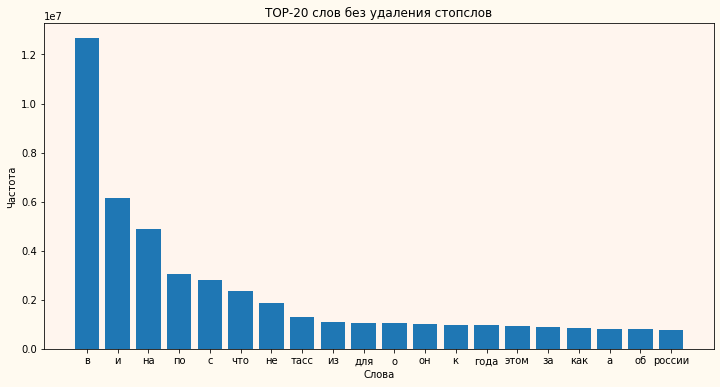

In [0]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [0]:
Counter(tokens_without_stopwords).most_common(20)

[('тасс', 1278771),
 ('россии', 785241),
 ('рф', 612604),
 ('сша', 397019),
 ('сообщил', 375779),
 ('корр', 356151),
 ('итар-тасс', 354178),
 ('области', 351189),
 ('тыс', 351147),
 ('словам', 331051),
 ('млн', 326739),
 ('отметил', 321335),
 ('1', 307416),
 ('рублей', 303153),
 ('заявил', 294376),
 ('глава', 254803),
 ('млрд', 253665),
 ('страны', 238765),
 ('сообщили', 237730),
 ('данным', 218190)]

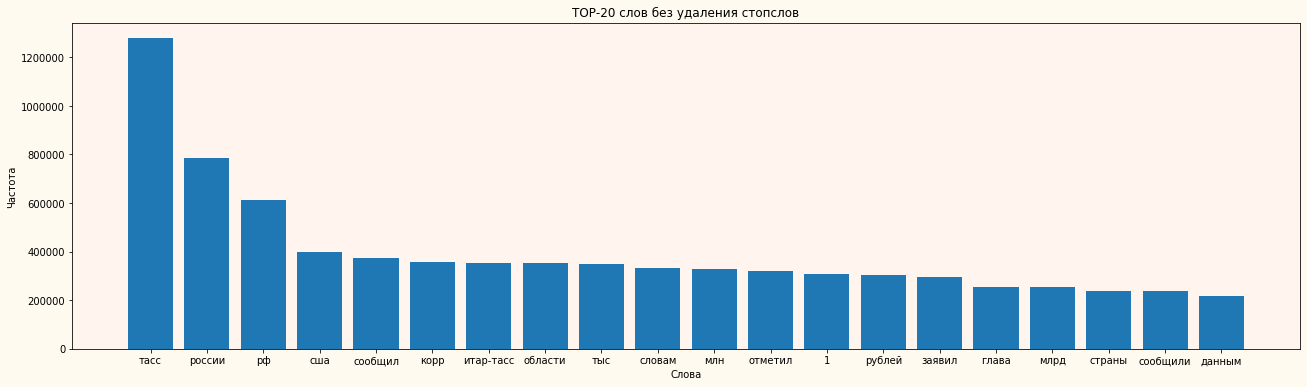

In [0]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [0]:
list_topics = list(data.listcolumns(None, 'tass', 'topics'))

In [0]:
len(set(list_topics))

288

### Рубрики в разрезе количества новостей

In [0]:
Counter(list_topics).most_common(10)

[('mezhdunarodnaya-panorama', 210656),
 ('sport', 189547),
 ('ekonomika', 159387),
 ('obschestvo', 134878),
 ('proisshestviya', 124474),
 ('politika', 84042),
 ('kultura', 34825),
 ('moskva', 30292),
 ('sibir-news', 25877),
 ('ural-news', 25204)]

## Распределение количества новостей по месяцам

### Удаление дубликатов

In [0]:
# Новый словарь, ключами которого будут новости, таким образом будет создан
# новый словарь, без дубликатов
news_by_dict = {i['text']: i for i in list_data}
new_items = list(news_by_dict.values())

In [0]:
# Проверь, что количество дубликатов совпало с тем, что были в предварительном анализе
# все верно
len(list_data) - len(new_items)

195

### Получение распределения

In [0]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [0]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x['date']) for x in new_items]

In [0]:
month_year = Counter(list_dates)

In [0]:
len(month_year)

103

In [0]:
month_year.most_common(20)

[('03-2019', 19829),
 ('10-2018', 19722),
 ('06-2019', 19403),
 ('04-2019', 19302),
 ('07-2019', 19256),
 ('02-2019', 18195),
 ('12-2018', 18112),
 ('11-2018', 17994),
 ('05-2019', 17774),
 ('10-2017', 17664),
 ('11-2017', 17102),
 ('09-2018', 16641),
 ('12-2017', 16464),
 ('03-2018', 16406),
 ('09-2017', 16320),
 ('08-2018', 16143),
 ('06-2016', 16092),
 ('04-2018', 15884),
 ('01-2019', 15792),
 ('02-2018', 15734)]

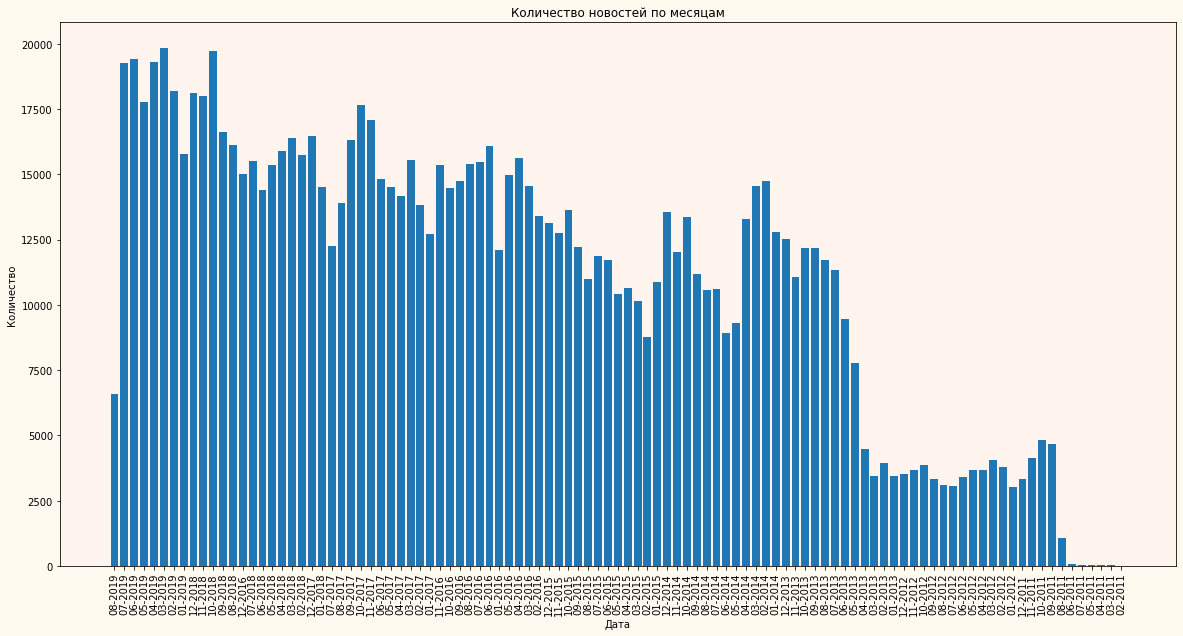

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()